<a href="https://colab.research.google.com/github/franm85/Proyecto_Trasplantes/blob/main/Proyecto_Deuda_P%C3%BAblica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANÁLISIS DE DATOS DE DEUDA PÚBLICA A NIVEL MUNDIAL (PONER AÑO)**
Cosas pendientes: 1) PONER TODO CON COMILLAS DOBLES 2) CONCLUSION 3) VER DE AGREGAR ALGUNOS EMOJIS 4) Unificar gráficos 5) Entender bien lo de las funciones con sus gráficos

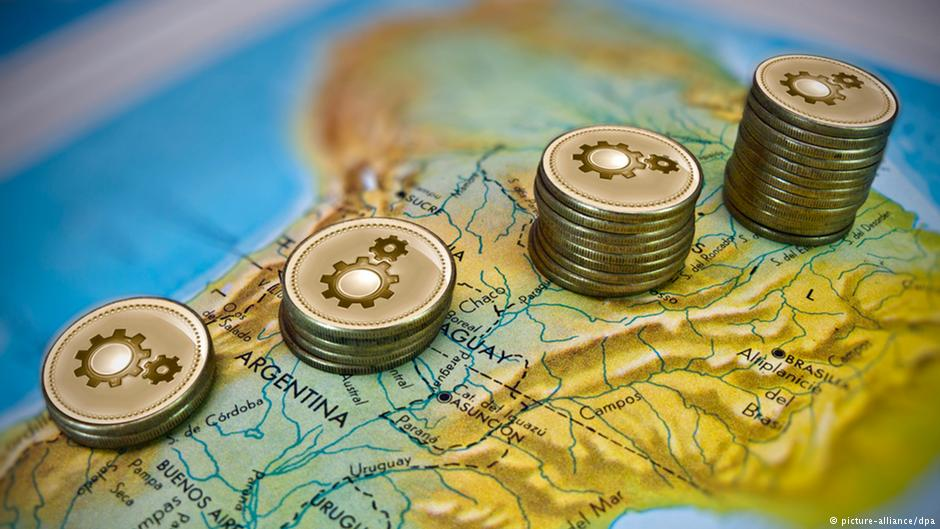

**Autor: Francisco Moyano Escalera**

**Fecha: Octubre 2021**

**Introducción:** en este notebook se analizarán datos referidos a la deuda pública de diversos países (VER SI DETALLO LOS TIPOS DE DEUDAS).
A continuación se presentan los distintos pasos para el análisis de la base de datos:

**1) Se realiza la conexión con Google Drive, en donde se encuentra almacenada la base de datos**

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2) Se importan las librerías de numpy, pandas y matplotlib de Python**




In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**3) Se realiza la carga de la base de datos de Deuda Pública y se la guarda en un dataframe de pandas**

In [105]:
deuda = pd.read_csv("/content/drive/MyDrive/Base de Datos Deuda Pública/deuda.csv")

**4) Se observa información del dataframe** 

In [106]:
deuda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Columns: 104 entries, Country Name to 2019Q4 [YR2019Q4]
dtypes: float64(100), object(4)
memory usage: 2.4+ MB


**5) Se observa la cantidad de filas y columnas del dataframe**

In [107]:
deuda.shape

(3072, 104)

**6) Se observa el número de elementos del dataframe**

In [108]:
deuda.size

319488

**7) Se** **obtiene** **una** **lista** **con** **los** **nombres** **de** **las** **columnas** **existentes**


In [109]:
deuda.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1995Q1 [YR1995Q1]', '1995Q2 [YR1995Q2]', '1995Q3 [YR1995Q3]',
       '1995Q4 [YR1995Q4]', '1996Q1 [YR1996Q1]', '1996Q2 [YR1996Q2]',
       ...
       '2017Q3 [YR2017Q3]', '2017Q4 [YR2017Q4]', '2018Q1 [YR2018Q1]',
       '2018Q2 [YR2018Q2]', '2018Q3 [YR2018Q3]', '2018Q4 [YR2018Q4]',
       '2019Q1 [YR2019Q1]', '2019Q2 [YR2019Q2]', '2019Q3 [YR2019Q3]',
       '2019Q4 [YR2019Q4]'],
      dtype='object', length=104)

**8) Se obtiene una serie con los tipos de datos de las columnas**

In [110]:
deuda.dtypes

Country Name          object
Country Code          object
Series Name           object
Series Code           object
1995Q1 [YR1995Q1]    float64
                      ...   
2018Q4 [YR2018Q4]    float64
2019Q1 [YR2019Q1]    float64
2019Q2 [YR2019Q2]    float64
2019Q3 [YR2019Q3]    float64
2019Q4 [YR2019Q4]    float64
Length: 104, dtype: object

**9) Se obtiene información de las filas**

In [111]:
deuda.index

RangeIndex(start=0, stop=3072, step=1)

**10) Se observan las primeras 5 filas del dataframe**

In [112]:
deuda.head()

,Country Name,Country Code,Series Name,Series Code,1995Q1 [YR1995Q1],1995Q2 [YR1995Q2],1995Q3 [YR1995Q3],1995Q4 [YR1995Q4],1996Q1 [YR1996Q1],1996Q2 [YR1996Q2],1996Q3 [YR1996Q3],1996Q4 [YR1996Q4],1997Q1 [YR1997Q1],1997Q2 [YR1997Q2],1997Q3 [YR1997Q3],1997Q4 [YR1997Q4],1998Q1 [YR1998Q1],1998Q2 [YR1998Q2],1998Q3 [YR1998Q3],1998Q4 [YR1998Q4],1999Q1 [YR1999Q1],1999Q2 [YR1999Q2],1999Q3 [YR1999Q3],1999Q4 [YR1999Q4],2000Q1 [YR2000Q1],2000Q2 [YR2000Q2],2000Q3 [YR2000Q3],2000Q4 [YR2000Q4],2001Q1 [YR2001Q1],2001Q2 [YR2001Q2],2001Q3 [YR2001Q3],2001Q4 [YR2001Q4],2002Q1 [YR2002Q1],2002Q2 [YR2002Q2],2002Q3 [YR2002Q3],2002Q4 [YR2002Q4],2003Q1 [YR2003Q1],2003Q2 [YR2003Q2],2003Q3 [YR2003Q3],2003Q4 [YR2003Q4],...,2010Q1 [YR2010Q1],2010Q2 [YR2010Q2],2010Q3 [YR2010Q3],2010Q4 [YR2010Q4],2011Q1 [YR2011Q1],2011Q2 [YR2011Q2],2011Q3 [YR2011Q3],2011Q4 [YR2011Q4],2012Q1 [YR2012Q1],2012Q2 [YR2012Q2],2012Q3 [YR2012Q3],2012Q4 [YR2012Q4],2013Q1 [YR2013Q1],2013Q2 [YR2013Q2],2013Q3 [YR2013Q3],2013Q4 [YR2013Q4],2014Q1 [YR2014Q1],2014Q2 [YR2014Q2],2014Q3 [YR2014Q3],2014Q4 [YR2014Q4],2015Q1 [YR2015Q1],2015Q2 [YR2015Q2],2015Q3 [YR2015Q3],2015Q4 [YR2015Q4],2016Q1 [YR2016Q1],2016Q2 [YR2016Q2],2016Q3 [YR2016Q3],2016Q4 [YR2016Q4],2017Q1 [YR2017Q1],2017Q2 [YR2017Q2],2017Q3 [YR2017Q3],2017Q4 [YR2017Q4],2018Q1 [YR2018Q1],2018Q2 [YR2018Q2],2018Q3 [YR2018Q3],2018Q4 [YR2018Q4],2019Q1 [YR2019Q1],2019Q2 [YR2019Q2],2019Q3 [YR2019Q3],2019Q4 [YR2019Q4]
0,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECD.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.842048e+09,3.693871e+09,4.132783e+09,3.870101e+09,4.256569e+09,4.425333e+09,4.161305e+09,4.170354e+09,4.250571e+09,4.126807e+09,4.530486e+12,4.649197e+09,4.705355e+09,7.104740e+12,7.461785e+09,8.051598e+09,7.530564e+09,7.605604e+09,7.413578e+09,7.076419e+09,6.468054e+09,6.824320e+09,7.389216e+09,6.900620e+09,6.831802e+09,7.175105e+09,7.165110e+09,7.069476e+12,7.184117e+09,7.832804e+09,8.157783e+09,8.582931e+09,8.899611e+09,8.702529e+09,9.089519e+09,9.260168e+12,9.766709e+09,9.107545e+09,8.941897e+09,NaN
1,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECN.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.863101e+09,3.650835e+12,4.085758e+12,3.831770e+09,4.217458e+12,4.385145e+09,4.123819e+09,4.115117e+09,4.153884e+09,4.035684e+09,4.372505e+09,4.479632e+09,4.526468e+09,6.398814e+09,6.726982e+09,7.085546e+12,6.782329e+12,6.856629e+09,6.508859e+12,6.387687e+09,5.744726e+09,6.083288e+09,6.196783e+09,5.966058e+09,5.950547e+09,6.389494e+09,6.458558e+09,6.006197e+09,6.060250e+09,6.714798e+09,6.945546e+09,7.293334e+12,7.651792e+09,7.621291e+09,7.755566e+09,7.628783e+09,8.230376e+09,7.707549e+09,7.691328e+09,NaN
2,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECX.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.490145e+09,2.353558e+09,2.574751e+09,2.712741e+09,2.848420e+09,2.946782e+09,2.904820e+09,2.912855e+09,2.898899e+09,2.848092e+09,3.147016e+09,3.198307e+09,3.031316e+09,3.084526e+09,3.280295e+09,3.690848e+09,3.269398e+09,3.343523e+09,3.373153e+09,3.305636e+09,3.141855e+09,3.216360e+09,3.513550e+09,3.665028e+09,3.731631e+09,3.779105e+09,3.826329e+09,3.643769e+09,3.773866e+09,3.932742e+09,4.101537e+09,4.279543e+09,4.382702e+09,4.153884e+09,4.158949e+09,4.434351e+09,4.899130e+09,4.374385e+09,4.222249e+09,NaN
3,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECF.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.469092e+09,2.396596e+09,2.621776e+09,2.751072e+09,2.887530e+09,2.986969e+09,2.942302e+09,2.968088e+12,2.995587

**11) Se observan las últimas 5 filas del dataframe**

In [113]:
deuda.tail()

,Country Name,Country Code,Series Name,Series Code,1995Q1 [YR1995Q1],1995Q2 [YR1995Q2],1995Q3 [YR1995Q3],1995Q4 [YR1995Q4],1996Q1 [YR1996Q1],1996Q2 [YR1996Q2],1996Q3 [YR1996Q3],1996Q4 [YR1996Q4],1997Q1 [YR1997Q1],1997Q2 [YR1997Q2],1997Q3 [YR1997Q3],1997Q4 [YR1997Q4],1998Q1 [YR1998Q1],1998Q2 [YR1998Q2],1998Q3 [YR1998Q3],1998Q4 [YR1998Q4],1999Q1 [YR1999Q1],1999Q2 [YR1999Q2],1999Q3 [YR1999Q3],1999Q4 [YR1999Q4],2000Q1 [YR2000Q1],2000Q2 [YR2000Q2],2000Q3 [YR2000Q3],2000Q4 [YR2000Q4],2001Q1 [YR2001Q1],2001Q2 [YR2001Q2],2001Q3 [YR2001Q3],2001Q4 [YR2001Q4],2002Q1 [YR2002Q1],2002Q2 [YR2002Q2],2002Q3 [YR2002Q3],2002Q4 [YR2002Q4],2003Q1 [YR2003Q1],2003Q2 [YR2003Q2],2003Q3 [YR2003Q3],2003Q4 [YR2003Q4],...,2010Q1 [YR2010Q1],2010Q2 [YR2010Q2],2010Q3 [YR2010Q3],2010Q4 [YR2010Q4],2011Q1 [YR2011Q1],2011Q2 [YR2011Q2],2011Q3 [YR2011Q3],2011Q4 [YR2011Q4],2012Q1 [YR2012Q1],2012Q2 [YR2012Q2],2012Q3 [YR2012Q3],2012Q4 [YR2012Q4],2013Q1 [YR2013Q1],2013Q2 [YR2013Q2],2013Q3 [YR2013Q3],2013Q4 [YR2013Q4],2014Q1 [YR2014Q1],2014Q2 [YR2014Q2],2014Q3 [YR2014Q3],2014Q4 [YR2014Q4],2015Q1 [YR2015Q1],2015Q2 [YR2015Q2],2015Q3 [YR2015Q3],2015Q4 [YR2015Q4],2016Q1 [YR2016Q1],2016Q2 [YR2016Q2],2016Q3 [YR2016Q3],2016Q4 [YR2016Q4],2017Q1 [YR2017Q1],2017Q2 [YR2017Q2],2017Q3 [YR2017Q3],2017Q4 [YR2017Q4],2018Q1 [YR2018Q1],2018Q2 [YR2018Q2],2018Q3 [YR2018Q3],2018Q4 [YR2018Q4],2019Q1 [YR2019Q1],2019Q2 [YR2019Q2],2019Q3 [YR2019Q3],2019Q4 [YR2019Q4]
3067,United States,USA,Gross PSD - Total - Short-term - Currency and ...,DP.DOD.DSCD.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3068,United States,USA,Gross PSD - Total - Short-term - Debt securiti...,DP.DOD.DSDS.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3069,United States,USA,Gross PSD - Total - Short-term - Insurance - p...,DP.DOD.DSIN.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3070,United States,USA,Gross PSD - Total - Short-term - Loans - Nomin...,DP.DOD.DSLO.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3071,United States,USA,Gross PSD - Total - Short-term - Other account...,DP.DOD.DSOA.CR.PS.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**12) Se extraen los seis primeros caracteres de la columna Fecha**

In [114]:
  deuda = deuda.melt(id_vars=['Country Name', 'Country Code', 'Series Name',
                                'Series Code'], var_name='Fecha', value_name='Cantidad')
  
  deuda['Fecha'] = deuda.Fecha.str[0:6]



**13) Se renombran las columnas Country Name, Country Code, Series Name y Series Code**

In [115]:
deuda.rename (columns={"Country Name":"Pais", "Country Code":"PaisId", "Series Name": "Tipo", "Series Code": "TipoId"}, inplace=True)

In [116]:
deuda.head()

,Pais,PaisId,Tipo,TipoId,Fecha,Cantidad
0,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECD.CR.PS.CD,1995Q1,NaN
1,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECN.CR.PS.CD,1995Q1,NaN
2,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECX.CR.PS.CD,1995Q1,NaN
3,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECF.CR.PS.CD,1995Q1,NaN
4,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECT.CR.PS.CD,1995Q1,NaN


**14) Se modifican los datos de la columna TipoId** 

In [121]:
tipos = {'DP.DOD.DECD.CR.PS.CD': 'Deuda interna', 'DP.DOD.DECN.CR.PS.CD': 'Deuda en moneda local', 'DP.DOD.DECX.CR.PS.CD': 'Deuda externa',
            'DP.DOD.DECF.CR.PS.CD': 'Deuda en moneda extranjera', 'DP.DOD.DLTC.CR.M1.PS.CD': 'Deuda a lago plazo', 'DP.DOD.DSTC.CR.PS.CD': 'Deuda a corto plazo'}
deuda['TipoId'] = deuda['TipoId'] = deuda.TipoId.apply(
        lambda x: tipos[x] if x in tipos.keys() else x) 
       

In [128]:
deuda.head()

,Pais,PaisId,Tipo,TipoId,Fecha,Cantidad
0,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda interna,1995Q1,NaN
1,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda en moneda local,1995Q1,NaN
2,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda externa,1995Q1,NaN
3,Albania,ALB,Gross PSD - Total - All maturities - All instr...,Deuda en moneda extranjera,1995Q1,NaN
4,Albania,ALB,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECT.CR.PS.CD,1995Q1,NaN


**15) Se observa el dataframe sin las columnas PaisId,Tipo y TipoId**

In [129]:
deuda.drop(columns=["PaisId","Tipo","TipoId"]).head()

,Pais,Fecha,Cantidad
0,Albania,1995Q1,NaN
1,Albania,1995Q1,NaN
2,Albania,1995Q1,NaN
3,Albania,1995Q1,NaN
4,Albania,1995Q1,NaN


**16) Se observa un dataframe con un resúmen estadístico**

In [125]:
deuda.describe()

,Cantidad
count,2.606200e+04
mean,1.010780e+13
std,5.325019e+13
min,-3.662860e+05
25%,1.214451e+08
50%,3.202292e+09
75%,3.229987e+10
max,8.771475e+14


**17) Se obtiene una serie con la cantidad de datos no-nulos de cada columna**

In [131]:
deuda.notnull().sum()

Pais        307200
PaisId      307200
Tipo        307200
TipoId      307200
Fecha       307200
Cantidad     26062
dtype: int64

**18) Se obtiene una serie con la cantidad de datos nulos de cada columna**

In [132]:
deuda.isnull().sum()

Pais             0
PaisId           0
Tipo             0
TipoId           0
Fecha            0
Cantidad    281138
dtype: int64

**19) Se eliminan los datos desconocidos NaN del dataframe**

In [135]:
deuda= deuda.dropna()
deuda


,Pais,PaisId,Tipo,TipoId,Fecha,Cantidad
96,Australia,AUS,Gross PSD - Total - All maturities - All instr...,Deuda interna,1995Q1,2.396174e+14
97,Australia,AUS,Gross PSD - Total - All maturities - All instr...,Deuda en moneda local,1995Q1,2.941207e+14
98,Australia,AUS,Gross PSD - Total - All maturities - All instr...,Deuda externa,1995Q1,5.450336e+10
100,Australia,AUS,Gross PSD - Total - All maturities - All instr...,DP.DOD.DECT.CR.PS.CD,1995Q1,2.941207e+14
101,Australia,AUS,Gross PSD - Total - All maturities - Currency ...,DP.DOD.DLCD.CR.PS.CD,1995Q1,1.845613e+10
...,...,...,...,...,...,...
304059,Uganda,UGA,Gross PSD - Total - Short-term - Currency and ...,DP.DOD.DSCD.CR.PS.CD,2019Q3,3.079714e+09
304060,Uganda,UGA,Gross PSD - Total - Short-term - Debt securiti...,DP.DOD.DSDS.CR.PS.CD,2019Q3,1.235779e+09
304061,Uganda,UGA,Gross PSD - Total - Short-term - Insurance - p...,DP.DOD.DSIN.CR.PS.CD,2019Q3,0.000000e+00
304062,Uganda,UGA,Gross PSD - Total - Short-term - Loans - Nomin...,DP.DOD.DSLO.CR.PS.CD,2019Q3,1.918885e+08


**20) Se observa si hay datos duplicados en el dataframe**




In [136]:
deuda.duplicated()

96        False
97        False
98        False
100       False
101       False
          ...  
304059    False
304060    False
304061    False
304062    False
304063    False
Length: 26062, dtype: bool

**21) Se accede a diferentes elementos del dataframe** AGREGAR UN PAR

In [137]:
deuda.iloc[10000,1]


'SVK'

In [139]:
deuda.Fecha

96        1995Q1
97        1995Q1
98        1995Q1
100       1995Q1
101       1995Q1
           ...  
304059    2019Q3
304060    2019Q3
304061    2019Q3
304062    2019Q3
304063    2019Q3
Name: Fecha, Length: 26062, dtype: object

**22) Se filtra datos de la columna Pais**

In [142]:
deuda['Pais'].tail(20)

304044    Uganda
304045    Uganda
304046    Uganda
304047    Uganda
304048    Uganda
304049    Uganda
304050    Uganda
304051    Uganda
304052    Uganda
304053    Uganda
304054    Uganda
304055    Uganda
304056    Uganda
304057    Uganda
304058    Uganda
304059    Uganda
304060    Uganda
304061    Uganda
304062    Uganda
304063    Uganda
Name: Pais, dtype: object

**23) Se filtran datos de la columna Cantidad**

In [141]:
deuda.loc[deuda["Cantidad"] > 30000, ["Pais","Cantidad"]]

,Pais,Cantidad
96,Australia,2.396174e+14
97,Australia,2.941207e+14
98,Australia,5.450336e+10
100,Australia,2.941207e+14
101,Australia,1.845613e+10
...,...,...
304058,Uganda,4.507640e+09
304059,Uganda,3.079714e+09
304060,Uganda,1.235779e+09
304062,Uganda,1.918885e+08


**24) y 25) PONER DOS EJEMPLOS MAS DE FILTROS CONDICIONALES**

**26) Se visualizan los datos a través de agrupaciones** METER UN PAR DE GRAFICOS SI O SI

In [143]:
deuda.groupby(by =["Pais","TipoId"])["Cantidad"].sum().reset_index(name="Promedio Deuda").sort_values(by="Promedio Deuda")

,Pais,TipoId,Promedio Deuda
425,Lebanon,DP.DOD.DLOA.CR.M1.PS.CD,0.000000e+00
341,Indonesia,DP.DOD.DSIN.CR.PS.CD,0.000000e+00
749,St. Lucia,DP.DOD.DSCD.CR.PS.CD,0.000000e+00
751,St. Lucia,DP.DOD.DSIN.CR.PS.CD,0.000000e+00
752,St. Lucia,DP.DOD.DSLO.CR.PS.CD,0.000000e+00
...,...,...,...
523,Mexico,Deuda a lago plazo,9.812595e+15
338,Indonesia,DP.DOD.DLTC.CR.PS.CD,1.034915e+16
518,Mexico,DP.DOD.DLTC.CR.PS.CD,1.125450e+16
507,Mexico,DP.DOD.DECT.CR.PS.CD,1.213648e+16


In [145]:
  plt.figure(figsize=(15,4)
  di=deuda.TipoId="Deuda Interna"  PONER ESTO EN FORMATO CORCHETE
  de=deud.TipoId="Deuda Externa"
  plt.bar(deuda.Pais,deuda.Cantidad,color="#00b894")
  plt.title("Promedio de Deuda")
  plt.ylabel('Cantidad')
  plt.show() 

SyntaxError: ignored

In [146]:
deuda.groupby(by = ["Pais","Fecha"])["Cantidad"].mean()

Pais     Fecha 
Albania  2009Q3    2.446124e+09
         2009Q4    2.495906e+10
         2010Q1    2.333982e+09
         2010Q2    5.326740e+11
         2010Q3    5.945968e+11
                       ...     
Uganda   2018Q3    3.276062e+09
         2018Q4    3.385166e+09
         2019Q1    5.768125e+11
         2019Q2    4.098839e+10
         2019Q3    3.677311e+09
Name: Cantidad, Length: 1159, dtype: float64

In [147]:
deuda.groupby(by = ["Pais","Tipo"])["Cantidad"].min()

Pais     Tipo                                                                                                            
Albania  Gross PSD - Total - All maturities - All instruments - Domestic creditors - Nominal Value - US$                     3.693871e+09
         Gross PSD - Total - All maturities - All instruments - Domestic currency - Nominal Value - US$                      3.831770e+09
         Gross PSD - Total - All maturities - All instruments - External creditors - Nominal Value - US$                     2.353558e+09
         Gross PSD - Total - All maturities - All instruments - Foreign currency - Nominal Value - US$                       2.396596e+09
         Gross PSD - Total - All maturities - All instruments - Nominal Value - US$                                          6.047429e+09
                                                                                                                                 ...     
Uganda   Gross PSD - Total - Short-term - Currency

**27) Análisis de datos extremos de la columna Cantidad** 

In [148]:
x = deuda ["Cantidad"]


In [149]:
Q1= np.percentile(x,25)
Q3= np.percentile(x,75)

In [150]:
rangointer= Q3-Q1

In [151]:
umbralsuperior = Q3 + 1.5*rangointer
umbralinferior = Q3 - 1.5*rangointer


In [152]:
umbralsuperior

80567512196.4044

In [153]:
umbralinferior

-15967768314.613754

In [154]:
np.mean(x > umbralsuperior) * 100

18.087637172895406

In [155]:
np.mean(x < umbralinferior) * 100

0.0

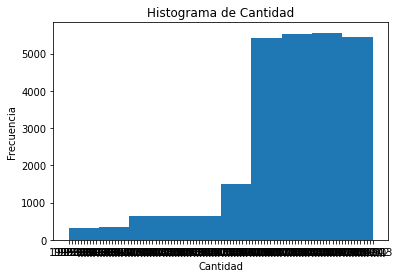

In [156]:
# ANALIZAR QUE GRÁFICO PONGO PARA ESTA PARTE
n, bins, patches=plt.hist(deuda.Fecha)
plt.title('Histograma de Cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show() #dibujamos el histograma

**28) Se crea una función que recibe un país y una fecha y devuelva una serie con la deuda total interna, externa, en moneda local, en moneda extranjera, a corto plazo y a largo plazo, de ese país en esa fecha**

In [157]:
def resumen_deuda(deudas, pais, fecha):
 deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.Fecha == fecha) & deuda.TipoId.isin(
 ['Deuda interna', 'Deuda en moneda local', 'Deuda externa', 'Deuda en moneda extranjera', 'Deuda a lago plazo', 'Deuda a corto plazo'])]
 return pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.TipoId)
  

In [158]:
resumen_deuda(deuda, "ALB", "2015Q1")

TipoId
Deuda interna                 6.468054e+09
Deuda en moneda local         5.744726e+09
Deuda externa                 3.141855e+09
Deuda en moneda extranjera    3.865180e+09
Deuda a lago plazo            4.797925e+09
Deuda a corto plazo           4.104917e+09
dtype: float64

**29) TITULO DEL GRÁFICO**

In [159]:
def resumen_deuda_grafico(deudas, pais, fecha):
  deuda_filtro = deuda[(deuda.PaisId == pais) & (deuda.Fecha == fecha) & deuda.TipoId.isin(
  ['Deuda interna', 'Deuda en moneda local', 'Deuda externa', 'Deuda en moneda extranjera', 'Deuda a lago plazo', 'Deuda a corto plazo'])]
  serie = pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.TipoId)
  plt.figure(figsize=(15,4))
  plt.bar(deuda_filtro.TipoId,serie,color="#00b894")
  plt.title("Composición de la Deuda por Pais")
  plt.ylabel('Cantidad')
  plt.show() 
  return


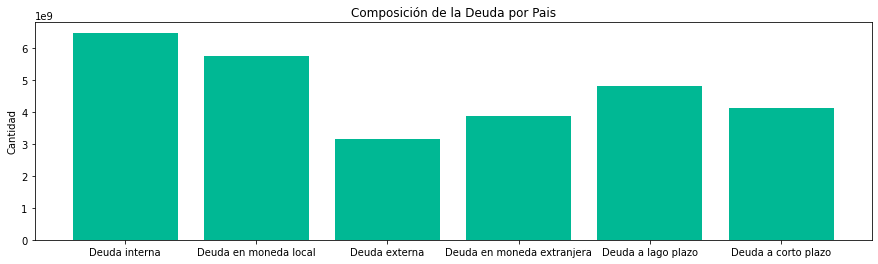

In [160]:
resumen_deuda_grafico(deuda, "ALB", "2015Q1")

**30) Se crea una función que recibe un tipo de deuda y una fecha, y devuelva una serie con la deuda de ese tipo de todos los países en esa fecha.**

In [161]:
def resumen_deuda2(deuda, tipo, fecha):
  deuda_filtro = deuda[(deuda.TipoId == tipo) & (deuda.Fecha == fecha)]
  return pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.Pais)
  

In [162]:
resumen_deuda2(deuda, 'Deuda externa', '2019Q1')

Pais
Albania            4.899130e+09
Australia          3.020834e+11
Bangladesh         4.129506e+10
Canada             4.843072e+11
Cote d'Ivoire      1.410853e+13
El Salvador        9.636363e+09
Fiji               6.734031e+08
Georgia            7.199245e+09
Guatemala          8.125716e+12
Honduras           7.350000e+09
Indonesia          2.388279e+14
Mauritius          1.516473e+09
Mexico             3.184665e+11
Moldova            1.873015e+09
Nicaragua          5.987605e+09
Nigeria            2.560963e+13
Paraguay           5.572998e+09
Philippines        4.016842e+10
Seychelles         4.387036e+08
Slovak Republic    3.081679e+10
St. Lucia          6.087913e+08
Uganda             8.415388e+09
dtype: float64

**31) RAFICO DE LA FUNCION**

In [163]:
def resumen_deuda2_grafico(deuda, tipo, fecha):
  deuda_filtro = deuda[(deuda.TipoId == tipo) & (deuda.Fecha == fecha)]
  serie= pd.Series(list(deuda_filtro.Cantidad),index=deuda_filtro.Pais)
  plt.barh(deuda_filtro.Pais,serie,color="#00b894")
  plt.title("")
  plt.ylabel('Pais')
  plt.show() 
  return


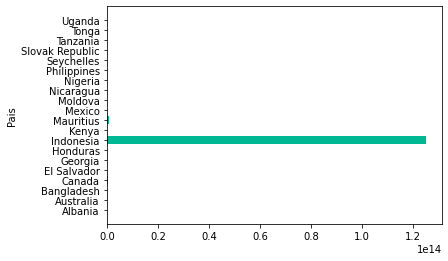

In [164]:
resumen_deuda2_grafico(deuda, 'Deuda externa', '2010Q3')

**32) Se crea una función que recibe un país y una fecha y devuelve un diagrama de sectores con la deuda interna y la deuda externa de ese país en esa fecha.**

In [165]:
def sectores_deuda_externa_interna(deudas, pais, fecha):
  deuda_filtro = deuda[(deuda.PaisId == pais) & (
        deuda.Fecha == fecha) & deuda.TipoId.isin(['Deuda interna', 'Deuda externa'])]
  serie = pd.Series(list(deuda_filtro.Cantidad), index=deuda_filtro.TipoId)
  fig, ax = plt.subplots()
  serie.plot(kind='pie', autopct='%2.0f%%', ax=ax)
  fig.set_size_inches(7,7)
  ax.set_title('Deuda externa vs interna de ' + pais + ' en ' + fecha, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
  ax.set_ylabel('')
  plt.show()
  return
  

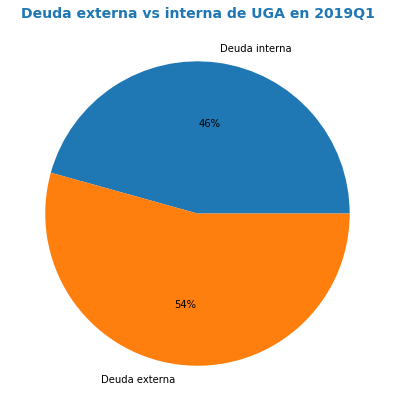

In [166]:
sectores_deuda_externa_interna(deuda, 'UGA', '2019Q1')

**33) Se crea una función que reciba una lista de países y un tipo de deuda y dibuje un diagrama de líneas con la evolución de ese tipo de deuda de esos países (una línea por país).**

In [167]:
def evolucion_tipo_deuda(deuda, paises, tipo):
  deuda_filtro = deuda[(deuda.PaisId.isin(paises)) & (deuda.TipoId == tipo)]
   # Convertimos la fecha en el índice
  deuda_filtro.set_index('Fecha', inplace=True)
  # Creamos la figura y los ejes
  fig, ax = plt.subplots()
    # Dibujamos el diagrama de barras
  deuda_filtro.groupby('PaisId').Cantidad.plot(legend=True, ax=ax)
   # Añadimos el título
  ax.set_title('Evolución de ' + tipo, loc="center",
                 fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
      # Guardamos el gráfico.
  plt.show()
  return
  


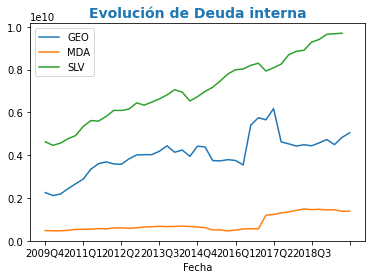

In [168]:
evolucion_tipo_deuda(deuda, ['GEO', 'SLV', 'MDA'], 'Deuda interna')

**34) Se crea una función que reciba una lista de países y una lista de tipos de deuda y devuelve un diagrama de cajas con las deudas de esos tipos de esos países (una caja por país y tipo de deuda)**

In [169]:
def cajas_deuda(deuda, paises, tipos):
    # Filtramos el país y los tipos de deuda
    deuda_filtro = deuda[(deuda.PaisId.isin(paises)) &
                         (deuda.TipoId.isin(tipos))]
    # Creamos la figura y los ejes
    fig, ax = plt.subplots()
    # Dibujamos el diagrama de cajas
    deuda_filtro.boxplot(column='Cantidad', by=['PaisId', 'TipoId'], ax=ax)
    # Añadimos el título
    ax.set_title('Deuda de ' + ', '.join(paises) + '\n(' + ', '.join(tipos) + ')',
                 loc="center", fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
    plt.suptitle('')
    # Rotamos las etiquetas del eje x
    plt.xticks(rotation=90)
    # Guardamos el gráfico.
    plt.show()
    return
    
  


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


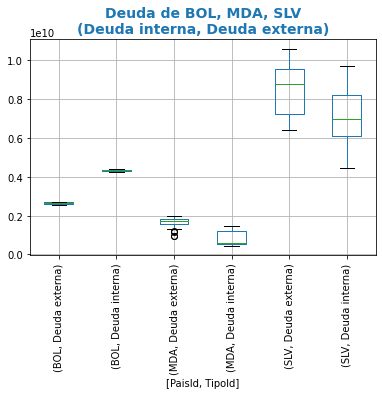

In [170]:
cajas_deuda(deuda, ['BOL', 'MDA', 'SLV'], ['Deuda interna', 'Deuda externa'])